# Loading Dataset and Libraries

In [326]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report

In [327]:
dataset=pd.read_csv('weather.csv')
data=dataset.copy()
data.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir   
0      8.0     24.3       0.0          3.4       6.3          NW  \
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm   
0           30.0         SW         NW           6.0  ...           29  \
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday   
0       1019.7       1015.0         7         7     14.4     23.6         No  \
1       1012.4       1008.4         5         3     17.5     25.7        Yes   
2       1009.5       1007.2         8         7     15.4     20.2        Yes   
3       1005.5       1007.0         2         7     13.5     14.1        Yes   
4       1018.3       1018.5         7         7     11.1     15.4        Yes   

   RISK_MM RainTomorrow  
0      3.6          Yes  
1      3.6          Yes  
2     39.8          Yes  
3      2.8          Yes  
4      0.0           No  

[5 rows x 22 columns]

# Data Exploration

In [328]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [329]:
data.columns.shape[0]

22

In [330]:
data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [332]:
data.describe()

MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine   
count  366.000000  366.000000  366.000000   366.000000  363.000000  \
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm   
count     364.000000    359.000000    366.000000   366.000000   366.000000  \
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.000000    13.000000   
25%        31.000000      6.000000     11.000000    64.000000    32.250000   
50%        39.000000      7.000000     17.000000    72.000000    43.000000   
75%        46.000000     13.000000     24.000000    81.000000    55.000000   
max        98.000000     41.000000     52.000000    99.000000    96.000000   

       Pressure9am  Pressure3pm    Cloud9am    Cloud3pm     Temp9am   
count   366.000000   366.000000  366.000000  366.000000  366.000000  \
mean   1019.709016  1016.810383    3.890710    4.024590   12.358470   
std       6.686212     6.469422    2.956131    2.666268    5.630832   
min     996.500000   996.800000    0.000000    0.000000    0.100000   
25%    1015.350000  1012.800000    1.000000    1.000000    7.625000   
50%    1020.150000  1017.400000    3.500000    4.000000   12.550000   
75%    1024.475000  1021.475000    7.000000    7.000000   17.000000   
max    1035.700000  1033.200000    8.000000    8.000000   24.700000   

          Temp3pm     RISK_MM  
count  366.000000  366.000000  
mean    19.230874    1.428415  
std      6.640346    4.225800  
min      5.100000    0.000000  
25%     14.150000    0.000000  
50%     18.550000    0.000000  
75%     24.000000    0.200000  
max     34.500000   39.800000

In [333]:
data['RainTomorrow'].value_counts()

RainTomorrow
No     300
Yes     66
Name: count, dtype: int64

# Data Visualization

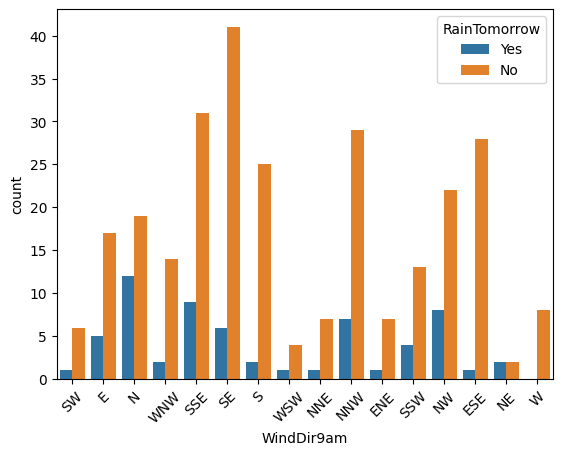

In [334]:
sns.countplot(x='WindDir9am', data=data, hue='RainTomorrow',linewidth=4);
plt.xticks(rotation=45);

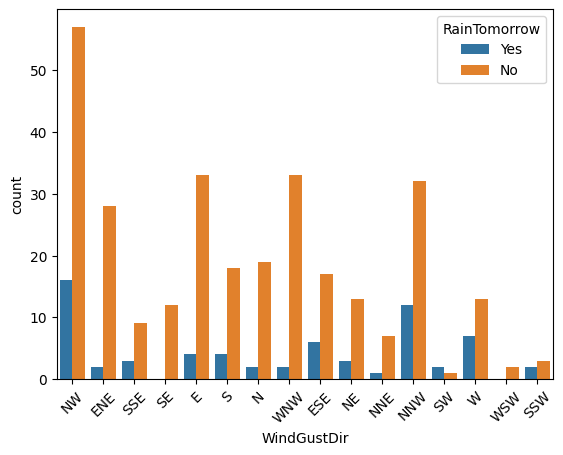

In [214]:
sns.countplot(x='WindGustDir', data=data, hue='RainTomorrow',linewidth=4);
plt.xticks(rotation=45);

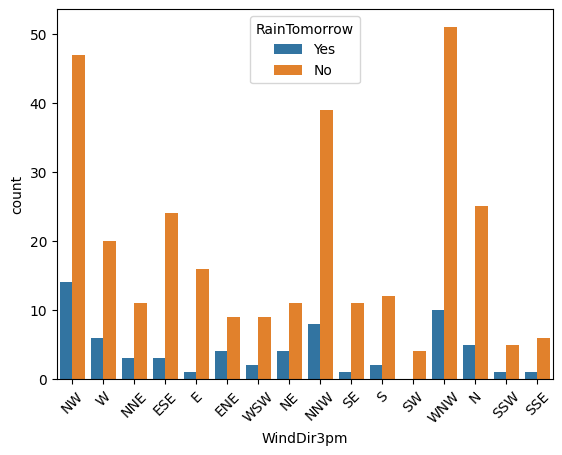

In [215]:
sns.countplot(x='WindDir3pm', data=data, hue='RainTomorrow',linewidth=4);
plt.xticks(rotation=45);

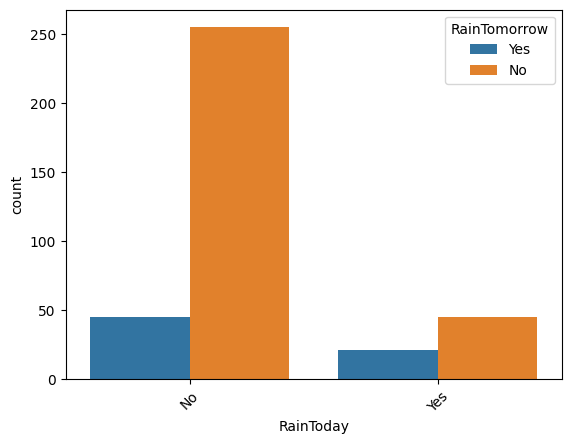

In [216]:
sns.countplot(x='RainToday', data=data, hue='RainTomorrow',linewidth=4);
plt.xticks(rotation=45);

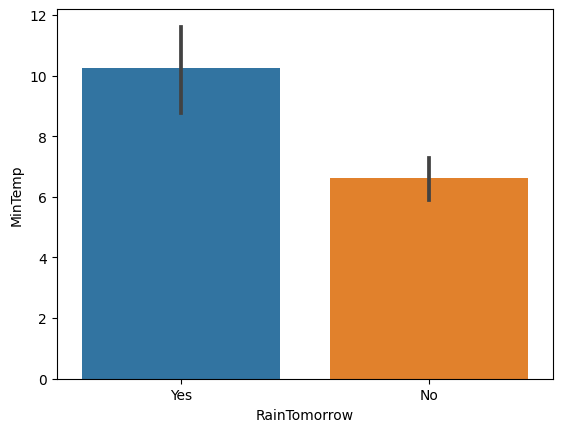

In [337]:
sns.barplot(x='RainTomorrow', y='MinTemp', data=data);

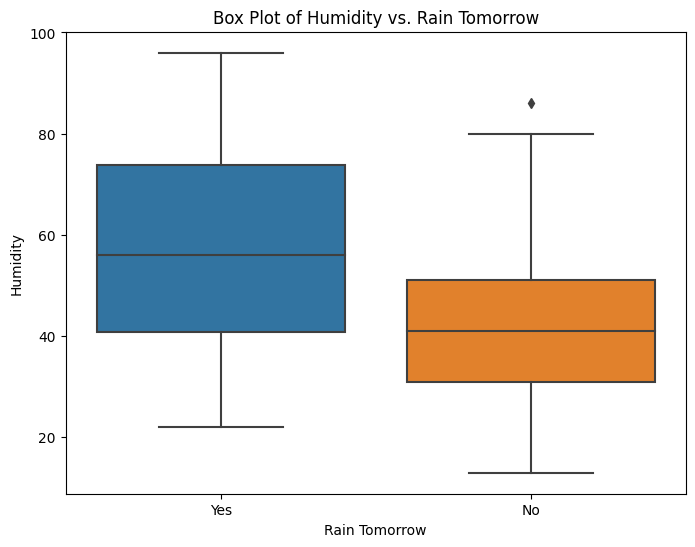

In [353]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=data)
plt.title('Box Plot of Humidity vs. Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Humidity')
plt.show()

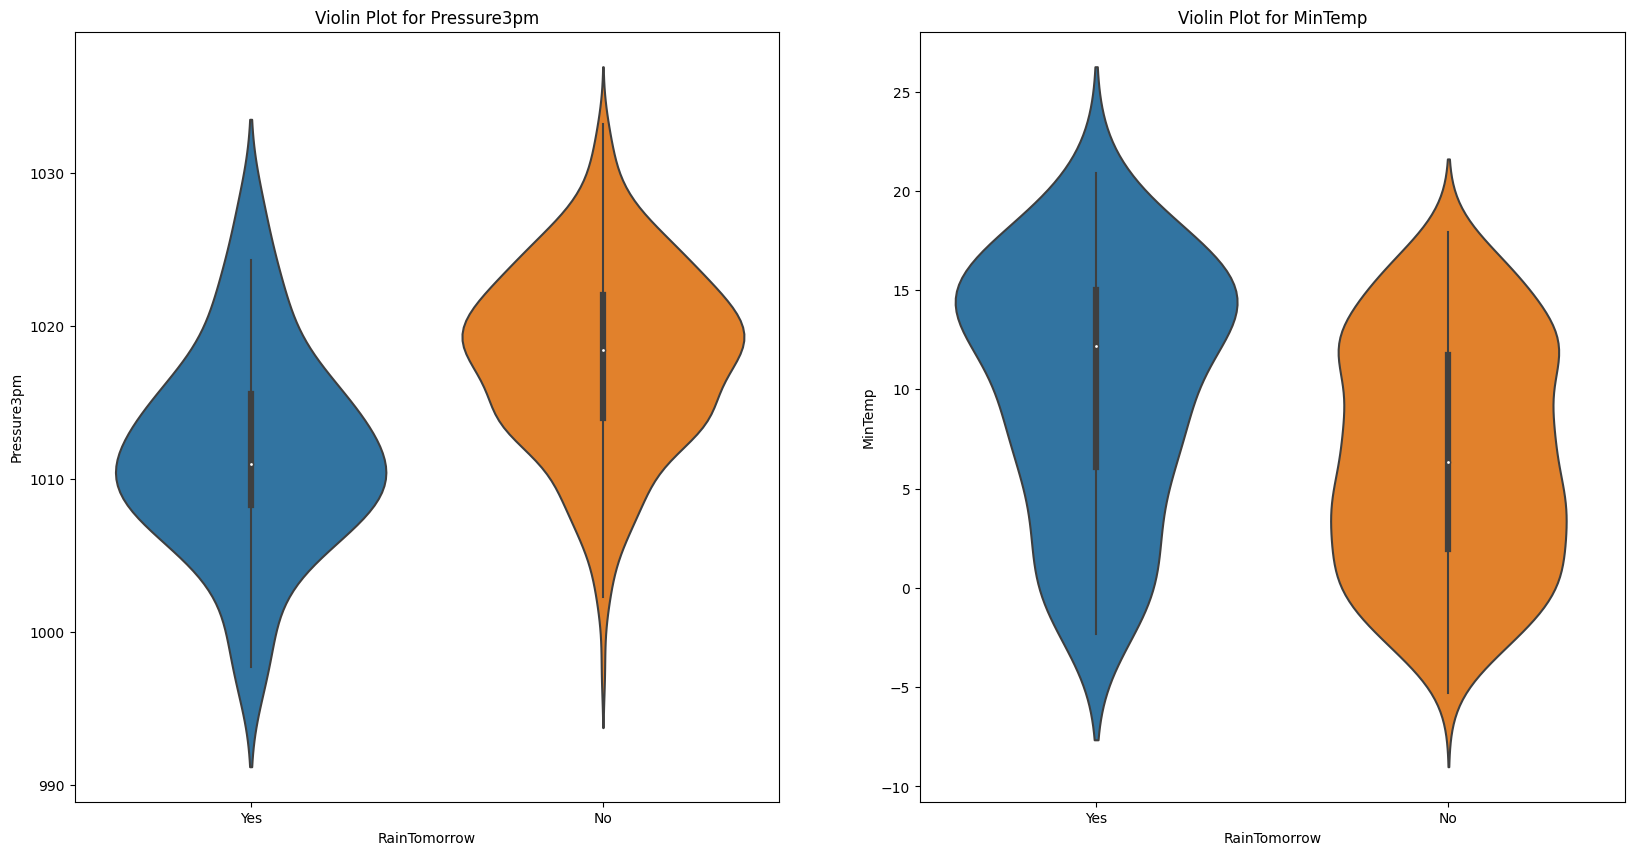

In [351]:
plt.figure(figsize=(20,10));
plt.subplot(1, 2, 1);
sns.violinplot(x='RainTomorrow', y='Pressure3pm', data=data);
plt.title('Violin Plot for Pressure3pm')

plt.subplot(1, 2, 2);
sns.violinplot(x='RainTomorrow', y='MinTemp', data=data);
plt.title('Violin Plot for MinTemp');

# Data Analysis

In [219]:
data[data['RainTomorrow'] == 'Yes']

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir   
0        8.0     24.3       0.0          3.4       6.3          NW  \
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
8        8.8     19.5       0.0          4.0       4.1           S   
..       ...      ...       ...          ...       ...         ...   
326      3.2     21.9       0.0          6.8       5.2          NW   
337     16.8     28.9       0.0         10.0      10.8         NNW   
338     14.4     20.7       7.6          9.4       4.9         NNW   
340     11.2     18.0       0.0          4.8       8.4           W   
347      6.7     26.1       0.0          6.2       7.5         SSW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm   
0             30.0         SW         NW           6.0  ...           29  \
1             39.0          E          W           4.0  ...           36   
2             85.0          N        NNE           6.0  ...           69   
3             54.0        WNW          W          30.0  ...           56   
8             48.0          E        ENE          19.0  ...           48   
..             ...        ...        ...           ...  ...          ...   
326           80.0        SSE         NW           2.0  ...           50   
337           70.0         NW         NW          31.0  ...           22   
338           33.0        NNW        NNW          20.0  ...           65   
340           65.0          N          W          24.0  ...           40   
347           70.0         NE        NNW           6.0  ...           47   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm   
0         1019.7       1015.0         7         7     14.4     23.6  \
1         1012.4       1008.4         5         3     17.5     25.7   
2         1009.5       1007.2         8         7     15.4     20.2   
3         1005.5       1007.0         2         7     13.5     14.1   
8         1026.1       1022.7         7         7     14.1     18.9   
..           ...          ...       ...       ...      ...      ...   
326       1012.1       1006.5         1         8     15.9     21.0   
337       1016.3       1011.8         1         1     22.5     28.4   
338       1015.5       1013.2         8         4     14.5     19.3   
340       1009.5       1005.3         5         4     12.8     16.2   
347       1020.9       1016.0         4         7     16.3     23.2   

     RainToday  RISK_MM RainTomorrow  
0           No      3.6          Yes  
1          Yes      3.6          Yes  
2          Yes     39.8          Yes  
3          Yes      2.8          Yes  
8           No     16.2          Yes  
..         ...      ...          ...  
326         No     17.4          Yes  
337         No      7.6          Yes  
338        Yes      3.0          Yes  
340         No      8.2          Yes  
347         No     13.2          Yes  

[66 rows x 22 columns]

In [220]:
data[data['RainToday']=='Yes']

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir   
1       14.0     26.9       3.6          4.4       9.7         ENE  \
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
9        8.4     22.8      16.2          5.4       7.7           E   
..       ...      ...       ...          ...       ...         ...   
327      7.8     16.2      17.4          6.4       7.9          NW   
338     14.4     20.7       7.6          9.4       4.9         NNW   
339     10.3     21.3       3.0          4.2       6.7         NNW   
341      0.3     16.0       8.2          5.4      11.8          NW   
348     11.9     21.1      13.2          6.6       NaN          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm   
1             39.0          E          W           4.0  ...           36  \
2             85.0          N        NNE           6.0  ...           69   
3             54.0        WNW          W          30.0  ...           56   
4             50.0        SSE        ESE          20.0  ...           49   
9             31.0          S        ESE           7.0  ...           32   
..             ...        ...        ...           ...  ...          ...   
327           50.0         NW          N          15.0  ...           44   
338           33.0        NNW        NNW          20.0  ...           65   
339           43.0        ENE          N           7.0  ...           46   
341           57.0        NNW          N          11.0  ...           45   
348           41.0        NNE          N           7.0  ...           61   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm   
1         1012.4       1008.4         5         3     17.5     25.7  \
2         1009.5       1007.2         8         7     15.4     20.2   
3         1005.5       1007.0         2         7     13.5     14.1   
4         1018.3       1018.5         7         7     11.1     15.4   
9         1024.1       1020.7         7         1     13.3     21.7   
..           ...          ...       ...       ...      ...      ...   
327       1016.7       1017.8         7         1      8.0     14.3   
338       1015.5       1013.2         8         4     14.5     19.3   
339       1018.1       1013.6         8         1     11.7     19.8   
341       1016.8       1013.3         1         1      6.9     14.6   
348       1019.2       1016.7         7         3     14.5     19.4   

     RainToday  RISK_MM RainTomorrow  
1          Yes      3.6          Yes  
2          Yes     39.8          Yes  
3          Yes      2.8          Yes  
4          Yes      0.0           No  
9          Yes      0.0           No  
..         ...      ...          ...  
327        Yes      0.0           No  
338        Yes      3.0          Yes  
339        Yes      0.0           No  
341        Yes      0.0           No  
348        Yes      0.6           No  

[66 rows x 22 columns]

In [256]:
NoRain=data[(data['RainToday'] == 'Yes') & (data['RainTomorrow'] == 'No')]
NoRain

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir   
4        7.6     16.1       2.8          5.6      10.6         SSE  \
9        8.4     22.8      16.2          5.4       7.7           E   
17      11.7     30.0       1.2          7.2      10.1           S   
22      12.8     18.5      25.8          2.8       0.6         ESE   
31      11.6     26.3       4.2          1.6      12.0         NNE   
33      13.3     26.5       6.6          3.8      11.8          NW   
37      16.5     28.2       4.0          4.2       8.8          NE   
46      10.8     21.7       1.4          2.8      10.6         ESE   
52       9.2     20.4      17.4          7.8      10.2         ENE   
54      11.3     21.7       3.4          8.2       5.6           E   
57      15.1     28.3      14.4          8.8      13.2         NNW   
73      17.0     33.8       2.0          9.0      13.5         WNW   
77      15.2     25.1       4.8          6.4      11.6           E   
80      17.2     24.7      12.2          1.4       8.1          NW   
92      16.0     23.8       2.2          5.4       6.2         SSE   
96      16.8     22.8       9.0          2.8       0.3         ESE   
99      12.4     19.9      16.2          5.4       5.6         ENE   
104     12.6     18.2      11.0          3.2       0.4         ENE   
113     12.7     28.6       6.6          3.2       8.6           W   
120      7.7     18.4      10.4          5.2      12.0           S   
128      9.5     27.4       3.0          4.8      11.5         NNW   
146     12.6     20.2      19.8          2.6       9.1           W   
154      7.0     14.3       2.6          9.6       9.7         WNW   
165      5.6     18.0       5.2          3.8       9.3           S   
179      4.3     11.3       7.2          4.4       5.6           W   
197      4.5     16.0       1.8          3.0       4.3          NW   
208      4.9     18.1       5.2          1.2       8.5         NNW   
216     10.6     15.1       3.8          0.2       2.6         SSE   
223     10.2     15.0       4.8          0.2       0.5          NW   
232      8.4     11.7       4.8          0.6       0.0           W   
243      5.3     11.7       2.0          3.6       5.6          NW   
250      2.9      9.5      16.8          1.4       6.5          NW   
253      2.9      8.4       1.6          1.4       7.7          NW   
261      2.4     11.6       1.2          2.2       8.1          NW   
263      2.3     11.6      19.2          1.8       7.5         WNW   
270     -1.6     10.7       1.4          0.8       9.1           S   
275      4.4     11.5       6.6          2.2       9.3         WNW   
279      4.8     14.1       4.0          1.6       8.3           S   
281      3.1     12.5       1.2          1.4       7.2           N   
305      4.1     14.8       7.4          2.6      10.8          NW   
320      3.9     13.2       3.4          6.6      11.0         WNW   
327      7.8     16.2      17.4          6.4       7.9          NW   
339     10.3     21.3       3.0          4.2       6.7         NNW   
341      0.3     16.0       8.2          5.4      11.8          NW   
348     11.9     21.1      13.2          6.6       NaN          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm   
4             50.0        SSE        ESE          20.0  ...           49  \
9             31.0          S        ESE           7.0  ...           32   
17            52.0         SW         NE           6.0  ...           26   
22            28.0          S         SE          13.0  ...           79   
31            41.0          E         SW           6.0  ...           46   
33            50.0         NW        WNW          20.0  ...           40   
37            39.0          E          N           7.0  ...           42   
46            48.0        SSE        ESE          13.0  ...           40   
52            39.0          N          N           9.0  ...           49   
54            41.0      

In [257]:
NoRain.MinTemp.mean()

8.851111111111111

In [258]:
NoRain.MaxTemp.mean()

18.824444444444445

In [225]:
YesRain=data[(data['RainToday'] == 'Yes') & (data['RainTomorrow'] == 'Yes')]
YesRain

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir   
1       14.0     26.9       3.6          4.4       9.7         ENE  \
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
30      15.1     20.4      22.6          2.4       0.2         SSE   
45      15.5     21.1       5.4          6.4       0.9           S   
49      12.6     23.1       3.4          1.6       2.3         NNW   
50      14.8     29.5       6.4          1.8       8.1           N   
51      19.9     22.0      11.0          4.4       5.9         NNW   
79      15.3     19.6      18.8          5.0       0.0          NE   
91      17.6     27.8       5.2         10.2       3.6         ESE   
95      18.2     22.6       1.8          8.0       0.0         ENE   
103     14.5     24.2       4.4          6.6       5.9           W   
112     16.3     24.8       1.8          7.8       3.8           S   
145     13.1     17.4       6.4          2.8       0.0         NNW   
164      7.1     19.8       2.0          3.2       7.7           W   
207      4.7     18.5       3.8          2.0       5.1         ESE   
222      8.6     13.7       6.2          2.2       0.0          NW   
304      6.1     17.2       4.0          2.2       2.4          NW   
318     13.1     19.4       9.8          8.8       6.0         NNW   
319      8.7     19.7       1.6          5.2       8.0          NW   
338     14.4     20.7       7.6          9.4       4.9         NNW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm   
1             39.0          E          W           4.0  ...           36  \
2             85.0          N        NNE           6.0  ...           69   
3             54.0        WNW          W          30.0  ...           56   
30            41.0          E          S           6.0  ...           90   
45            31.0        SSE         NE           6.0  ...           86   
49            30.0          N         NW           4.0  ...           74   
50            41.0         NW         NW           6.0  ...           48   
51            76.0          N        WNW          41.0  ...           62   
79            33.0        SSE        NNE           9.0  ...           88   
91            39.0          N        NNW          13.0  ...           49   
95            33.0        SSE        ENE           7.0  ...           76   
103           48.0        NNW        WNW           9.0  ...           60   
112           50.0        NNW          N           4.0  ...           56   
145           43.0          N          N          11.0  ...           93   
164           39.0        SSE         NW          13.0  ...           56   
207           22.0        NNW          W           6.0  ...           50   
222           31.0          E        NaN           2.0  ...           94   
304           59.0         NW        WNW          24.0  ...           85   
318           67.0          N         NW          39.0  ...           43   
319           98.0         NW        NNW          31.0  ...           33   
338           33.0        NNW        NNW          20.0  ...           65   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm   
1         1012.4       1008.4         5         3     17.5     25.7  \
2         1009.5       1007.2         8         7     15.4     20.2   
3         1005.5       1007.0         2         7     13.5     14.1   
30        1015.0       1014.1         8         8     17.0     16.3   
45        1010.1       1008.6         8         8     16.6     20.0   
49        1015.8       1014.1         8         7     15.3     20.4   
50        1012.9       1008.3         2         7     21.0     28.2   
51         996.5        996.8         8         3     20.6     19.6   
79        1008.7       1006.0         8         8     18.0     18.6   
91        1014.6       1012.8         7         8     21.4     26.3   
95        

In [226]:
YesRain.MinTemp.mean()

13.171428571428569

In [230]:
YesRain.MaxTemp.mean()

21.299999999999994

# Feature Engineering

In [231]:
data.isna().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [232]:
data[pd.isna(data['WindDir9am'])]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir   
113     12.7     28.6       6.6          3.2       8.6           W  \
118     11.7     27.6       0.0          7.8       8.1           W   
127     10.8     29.2       0.0          8.4       7.5           E   
138     12.5     29.9       0.0          5.8      10.7          NW   
140     11.5     29.3       0.0          5.2       8.0          NW   
174      7.5     19.0       0.0          4.0       6.8         ENE   
176      5.0     20.9       0.0          2.0       8.9         WNW   
180     -2.1     13.8       0.2          1.8       9.5         NNW   
189     -0.2     18.1       0.0          4.4       9.4          NW   
195      2.2     18.6       0.0          2.0       9.2         NNW   
200     -2.7     18.1       0.0          2.2       9.3           W   
208      4.9     18.1       5.2          1.2       8.5         NNW   
209      1.4     16.8       0.0          1.6       8.2          NW   
212     -0.9     18.5       0.0          2.2       8.9           E   
213      0.6     14.0       0.0          2.2       2.7          NE   
237      4.3     12.6       0.0          2.0       9.0          NW   
247     -0.1     14.2       0.0          1.4       7.0           W   
249      3.0     11.1       0.8          1.4       0.2           W   
250      2.9      9.5      16.8          1.4       6.5          NW   
255      0.5     11.0       0.0          1.0       0.9         NNW   
257     -1.7     13.6       0.0          1.8       5.2         NNW   
259     -1.8     11.5       0.0          0.6       4.7         NNW   
262     -1.1     11.0       0.2          1.8       0.0         WNW   
272     -2.8     12.2       0.0          2.6       8.7         NNW   
273     -2.8     14.1       0.0          2.2       6.8         WNW   
278     -1.9     10.9       0.0          1.8       4.2           S   
299     -1.5     17.3       0.0          2.8       9.0          NW   
302     -0.2     16.2       0.0          3.4       5.9           E   
312      0.2     15.5       1.0          2.4       9.4          SE   
351      5.0     24.1       0.0          6.2      12.0         NNW   
360      7.9     26.1       0.0          6.8       3.5         NNW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm   
113           50.0        NaN          W           NaN  ...           42  \
118           48.0        NaN          W           NaN  ...           25   
127           50.0        NaN        ENE           NaN  ...           34   
138           43.0        NaN        WNW           0.0  ...           30   
140           46.0        NaN        WSW           0.0  ...           35   
174           26.0        NaN        ESE           0.0  ...           43   
176           22.0        NaN         NW           0.0  ...           42   
180           22.0        NaN        NNW           0.0  ...           40   
189           24.0        NaN         NW           0.0  ...           44   
195           31.0        NaN        NNW           NaN  ...           44   
200           52.0        NaN        WNW           0.0  ...           36   
208           22.0        NaN         NW           0.0  ...           55   
209           20.0        NaN         NW           0.0  ...           50   
212           22.0        NaN          N           0.0  ...           38   
213           17.0        NaN        ENE           NaN  ...           67   
237           46.0        NaN        WNW           0.0  ...           54   
247           13.0        NaN        WNW           NaN  ...           55   
249           35.0        NaN          N           0.0  ...           96   
250           35.0        NaN         NW           0.0  ...           72   
255           31.0        NaN         NW           0.0  ...           69   
257           28.0        NaN        NNW           NaN  ...           46   
259           41.0        NaN        NNW           0.0  ...           55   
262           41

In [233]:
data.dropna(inplace=True)

In [234]:
data.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [235]:
data['WindGustDir'].unique()

array(['NW', 'ENE', 'SSE', 'SE', 'E', 'S', 'N', 'WNW', 'ESE', 'NE', 'NNE',
       'NNW', 'SW', 'W', 'WSW', 'SSW'], dtype=object)

In [236]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
combined_values = pd.concat([data['WindGustDir'], data['WindDir9am'], data['WindDir3pm']])
encoder.fit(combined_values)
data['encoded_WindGustDir'] = encoder.transform(data['WindGustDir'])
data['encoded_WindDir9am'] = encoder.transform(data['WindDir9am'])
data['encoded_WindDir3pm'] = encoder.transform(data['WindDir3pm'])

In [237]:
data.drop(['WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [238]:
data.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed   
0      8.0     24.3       0.0          3.4       6.3           30.0  \
1     14.0     26.9       3.6          4.4       9.7           39.0   
2     13.7     23.4       3.6          5.8       3.3           85.0   
3     13.3     15.5      39.8          7.2       9.1           54.0   
4      7.6     16.1       2.8          5.6      10.6           50.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Cloud9am   
0           6.0            20           68           29  ...         7  \
1           4.0            17           80           36  ...         5   
2           6.0             6           82           69  ...         8   
3          30.0            24           62           56  ...         2   
4          20.0            28           68           49  ...         7   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM RainTomorrow   
0         7     14.4     23.6         No      3.6          Yes  \
1         3     17.5     25.7        Yes      3.6          Yes   
2         7     15.4     20.2        Yes     39.8          Yes   
3         7     13.5     14.1        Yes      2.8          Yes   
4         7     11.1     15.4        Yes      0.0           No   

   encoded_WindGustDir encoded_WindDir9am  encoded_WindDir3pm  
0                    7                 12                   7  
1                    1                  0                  13  
2                    7                  3                   5  
3                    7                 14                  13  
4                   10                 10                   2  

[5 rows x 22 columns]

In [239]:
data['RainToday'] = data['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0)

In [240]:
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)

In [241]:
data.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed   
0      8.0     24.3       0.0          3.4       6.3           30.0  \
1     14.0     26.9       3.6          4.4       9.7           39.0   
2     13.7     23.4       3.6          5.8       3.3           85.0   
3     13.3     15.5      39.8          7.2       9.1           54.0   
4      7.6     16.1       2.8          5.6      10.6           50.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Cloud9am   
0           6.0            20           68           29  ...         7  \
1           4.0            17           80           36  ...         5   
2           6.0             6           82           69  ...         8   
3          30.0            24           62           56  ...         2   
4          20.0            28           68           49  ...         7   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow   
0         7     14.4     23.6          0      3.6             1  \
1         3     17.5     25.7          1      3.6             1   
2         7     15.4     20.2          1     39.8             1   
3         7     13.5     14.1          1      2.8             1   
4         7     11.1     15.4          1      0.0             0   

   encoded_WindGustDir  encoded_WindDir9am  encoded_WindDir3pm  
0                    7                  12                   7  
1                    1                   0                  13  
2                    7                   3                   5  
3                    7                  14                  13  
4                   10                  10                   2  

[5 rows x 22 columns]

In [242]:
X=data.drop(columns='RainTomorrow')
y=data['RainTomorrow']

In [243]:
X

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed   
0        8.0     24.3       0.0          3.4       6.3           30.0  \
1       14.0     26.9       3.6          4.4       9.7           39.0   
2       13.7     23.4       3.6          5.8       3.3           85.0   
3       13.3     15.5      39.8          7.2       9.1           54.0   
4        7.6     16.1       2.8          5.6      10.6           50.0   
..       ...      ...       ...          ...       ...            ...   
361      9.0     30.7       0.0          7.6      12.1           76.0   
362      7.1     28.4       0.0         11.6      12.7           48.0   
363     12.5     19.9       0.0          8.4       5.3           43.0   
364     12.5     26.9       0.0          5.0       7.1           46.0   
365     12.3     30.2       0.0          6.0      12.6           78.0   

     WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Pressure3pm   
0             6.0            20           68           29  ...       1015.0  \
1             4.0            17           80           36  ...       1008.4   
2             6.0             6           82           69  ...       1007.2   
3            30.0            24           62           56  ...       1007.0   
4            20.0            28           68           49  ...       1018.5   
..            ...           ...          ...          ...  ...          ...   
361           7.0            50           38           15  ...       1010.8   
362           2.0            19           45           22  ...       1016.9   
363          11.0             9           63           47  ...       1022.8   
364           6.0            28           69           39  ...       1016.2   
365          31.0            35           43           13  ...       1009.2   

     Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM   
0           7         7     14.4     23.6          0      3.6  \
1           5         3     17.5     25.7          1      3.6   
2           8         7     15.4     20.2          1     39.8   
3           2         7     13.5     14.1          1      2.8   
4           7         7     11.1     15.4          1      0.0   
..        ...       ...      ...      ...        ...      ...   
361         1         3     20.4     30.0          0      0.0   
362         0         1     17.2     28.2          0      0.0   
363         3         2     14.5     18.3          0      0.0   
364         6         7     15.8     25.9          0      0.0   
365         1         1     23.8     28.6          0      0.0   

     encoded_WindGustDir  encoded_WindDir9am  encoded_WindDir3pm  
0                      7                  12                   7  
1                      1                   0                  13  
2                      7                   3                   5  
3                      7                  14                  13  
4                     10                  10                   2  
..                   ...                 ...                 ...  
361                    6                  10                   7  
362                    3                   6                   6  
363                    2                   1                   1  
364                    7                  11                  14  
365                    7                   7                  14  

[328 rows x 21 columns]

In [244]:
y

0      1
1      1
2      1
3      1
4      0
      ..
361    0
362    0
363    0
364    0
365    0
Name: RainTomorrow, Length: 328, dtype: int64

In [245]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_resampled, y_resampled=smote.fit_resample(X,y)
oversampled_data = pd.concat([X_resampled, y_resampled], axis=1)
oversampled_data.RainTomorrow.value_counts()

RainTomorrow
1    268
0    268
Name: count, dtype: int64

In [246]:
from scipy import stats

# Assuming 'data' is your DataFrame
# Calculate Z-Score for each column
z_scores = stats.zscore(oversampled_data)

# Determine threshold for considering a data point as an outlier
threshold = 3

# Find indices of outliers
outlier_indices = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers
data_no_outliers = oversampled_data[~outlier_indices]

In [309]:
data_no_outliers.loc[4]

MinTemp                   7.6
MaxTemp                  16.1
Rainfall                  2.8
Evaporation               5.6
Sunshine                 10.6
WindGustSpeed            50.0
WindSpeed9am             20.0
WindSpeed3pm             28.0
Humidity9am              68.0
Humidity3pm              49.0
Pressure9am            1018.3
Pressure3pm            1018.5
Cloud9am                  7.0
Cloud3pm                  7.0
Temp9am                  11.1
Temp3pm                  15.4
RainToday                 1.0
RISK_MM                   0.0
encoded_WindGustDir      10.0
encoded_WindDir9am       10.0
encoded_WindDir3pm        2.0
RainTomorrow              0.0
Name: 4, dtype: float64

In [267]:
X_nooutliers=data_no_outliers.drop(columns='RainTomorrow')
y_nooutliers=data_no_outliers['RainTomorrow']

In [268]:
Xouttrain,Xouttest,youttrain,youttest=train_test_split(X_nooutliers,y_nooutliers,test_size=0.2,random_state=42)

In [283]:
clf=RandomForestClassifier()
clf.fit(Xouttrain,youttrain);

In [284]:
y_pred=clf.predict(Xouttest)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [285]:
mse = mean_squared_error(youttest, y_pred)
mse

0.0

In [287]:
ypredtrain=clf.predict(Xouttrain)

In [290]:
mse = mean_squared_error(youttrain, ypredtrain)
mse

0.0

In [292]:
accuracy_score(youttest, y_pred)

1.0

In [319]:
import numpy as np
input=[7,16.100000,3.800000,6.600000,10.600000,50.000000,20.000000,22,68,49,1018.3,1018.5,7,7,11.100000,15.400000,1,0.000000,10,10,2]

input_data = np.array(input).reshape(1, -1)
clf.predict(input_data)

C:\Users\91735\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [317]:
X_train, X_temp, y_train, y_temp = train_test_split(X_nooutliers,y_nooutliers,test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [318]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 3: Validate the model
y_val_pred = clf.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

# Step 4: Test the model
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 1.0
Test Accuracy: 1.0


In [324]:
clf = LogisticRegression(max_iter=1500)
clf.fit(X_train, y_train)

# Step 3: Validate the model
y_val_pred = clf.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

# Step 4: Test the model
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9726027397260274
Test Accuracy: 0.9864864864864865
